##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Importing dataset

In [2]:
path = r"C:\Users\HP\Desktop\backorder project\notebook\data\backorder_data.csv"        # Run the ipynb file inside data folder first to avoid errors 
df= pd.read_csv(path,index_col=0) 
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_14084\1708164758.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(path,index_col=0)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1929937 entries, 0 to 1929936
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 353.4+ MB


##### Checking null values presence

In [5]:
missing_values = df.isnull().mean() * 100   # To check the percentage null values for each col
print(missing_values)

sku                  0.000000
national_inv         0.000104
lead_time            5.990817
in_transit_qty       0.000104
forecast_3_month     0.000104
forecast_6_month     0.000104
forecast_9_month     0.000104
sales_1_month        0.000104
sales_3_month        0.000104
sales_6_month        0.000104
sales_9_month        0.000104
min_bank             0.000104
potential_issue      0.000104
pieces_past_due      0.000104
perf_6_month_avg     0.000104
perf_12_month_avg    0.000104
local_bo_qty         0.000104
deck_risk            0.000104
oe_constraint        0.000104
ppap_risk            0.000104
stop_auto_buy        0.000104
rev_stop             0.000104
went_on_backorder    0.000104
dtype: float64


In [6]:
df[df['national_inv'].isnull()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929936,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Turns out that there are two rows which has no data for any feature which indicates that there is a data entry error,so we can remove it.

In [7]:
df= df.drop(index=[1687860,1929936])

##### Let's impute the Lead time column with median values!!

In [8]:
df['lead_time']= df['lead_time'].fillna(df['lead_time'].median())

##### Checking Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

##### Removing sku column as we don't need the id column for analysis

In [10]:
df = df.drop(['sku'],axis=1)

##### Seperating Numerical and Categorical Columns

In [11]:
num_features = df.select_dtypes(include=np.number)
cat_features = df.select_dtypes(include=['bool','object'])

In [12]:
num_features.describe().T  # Descriptive Stats

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1929935.0,7.885898,6.839711,0.0,4.00,8.00,8.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855852,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0


##### Outliers are present as max and 75%ile values have a huge difference. Some values are negative to like for national_inv, which represents the current inventory of the product across the nation, which indicates that the demand for a product has exceeded the available stock and highlights a potential supply chain issue. Scaling is required in this data.

In [13]:
df[df['national_inv'] < 0]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
176,-55.0,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,387.0,...,0.0,-99.00,-99.00,56.0,No,No,No,Yes,No,Yes
191,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,...,0.0,0.49,0.72,525.0,No,No,No,Yes,No,Yes
342,-48.0,8.0,97.0,67.0,85.0,115.0,19.0,87.0,165.0,199.0,...,0.0,0.47,0.47,60.0,Yes,No,No,Yes,No,No
552,-1.0,12.0,0.0,6.0,6.0,6.0,0.0,1.0,2.0,2.0,...,0.0,0.82,0.79,1.0,No,No,No,Yes,No,No
916,-94.0,9.0,80.0,5.0,8.0,8.0,205.0,205.0,205.0,205.0,...,0.0,0.91,0.74,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928278,-187.0,8.0,0.0,1015.0,1015.0,1015.0,0.0,185.0,185.0,585.0,...,0.0,0.00,0.00,187.0,Yes,No,No,Yes,No,No
1928295,-2.0,8.0,0.0,18.0,18.0,24.0,1.0,4.0,12.0,20.0,...,0.0,0.08,0.26,2.0,No,No,No,Yes,No,Yes
1928361,-12.0,9.0,0.0,23.0,35.0,43.0,13.0,22.0,33.0,44.0,...,0.0,0.77,0.81,12.0,No,No,Yes,Yes,No,No
1929278,-34.0,14.0,4.0,1152.0,1152.0,1512.0,92.0,649.0,1012.0,1458.0,...,0.0,0.93,0.95,72.0,No,No,No,Yes,No,No


In [14]:
# IQR Method to find the percentage of outliers present in each column

D={}
for feature in num_features.columns:
    Q1 = num_features[feature].quantile(0.25)  
    Q3 = num_features[feature].quantile(0.75)  
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = num_features[(num_features[feature] < lower_bound) | (num_features[feature] > upper_bound)]
    D[feature]= round((len(outliers)/len(num_features))*100,2)

D

{'national_inv': 15.05,
 'lead_time': 2.85,
 'in_transit_qty': 20.1,
 'forecast_3_month': 20.41,
 'forecast_6_month': 19.57,
 'forecast_9_month': 19.43,
 'sales_1_month': 17.62,
 'sales_3_month': 17.27,
 'sales_6_month': 17.27,
 'sales_9_month': 17.3,
 'min_bank': 21.01,
 'pieces_past_due': 1.47,
 'perf_6_month_avg': 11.12,
 'perf_12_month_avg': 11.64,
 'local_bo_qty': 1.36}

national_inv
Skew : 340.22


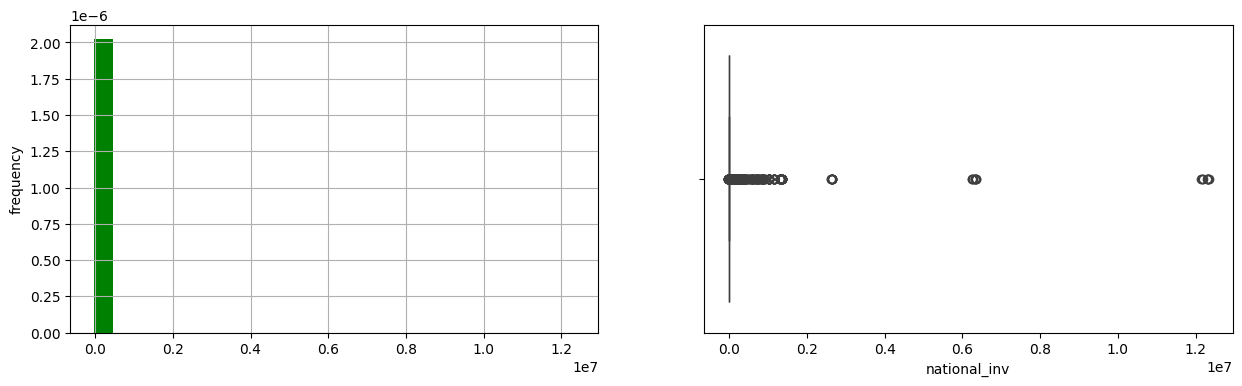

lead_time
Skew : 4.7


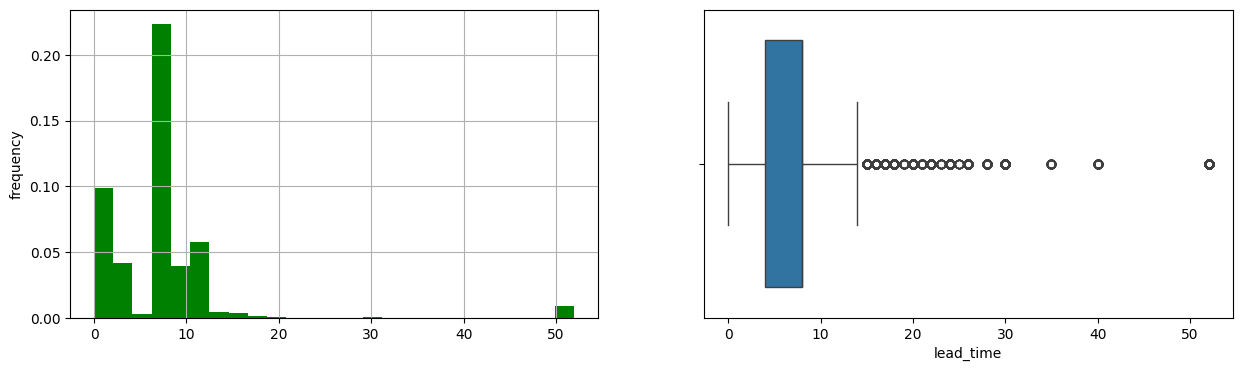

in_transit_qty
Skew : 168.98


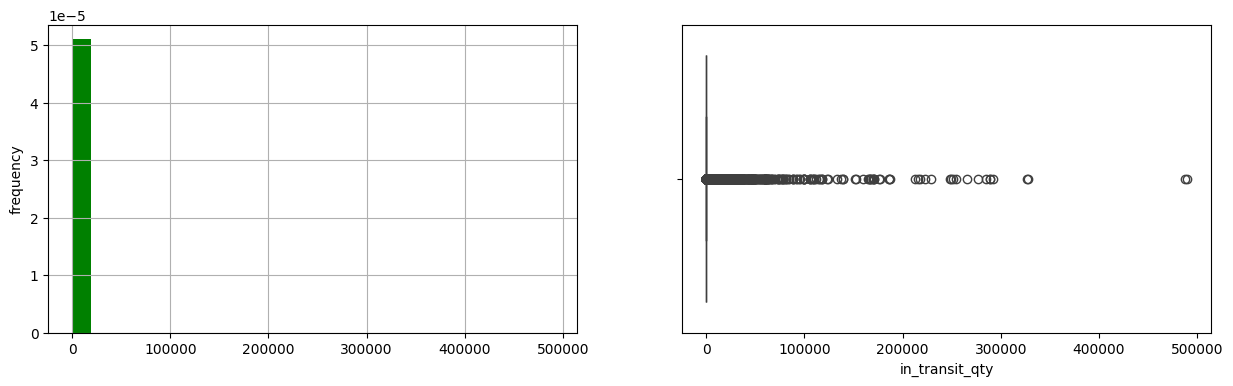

forecast_3_month
Skew : 142.78


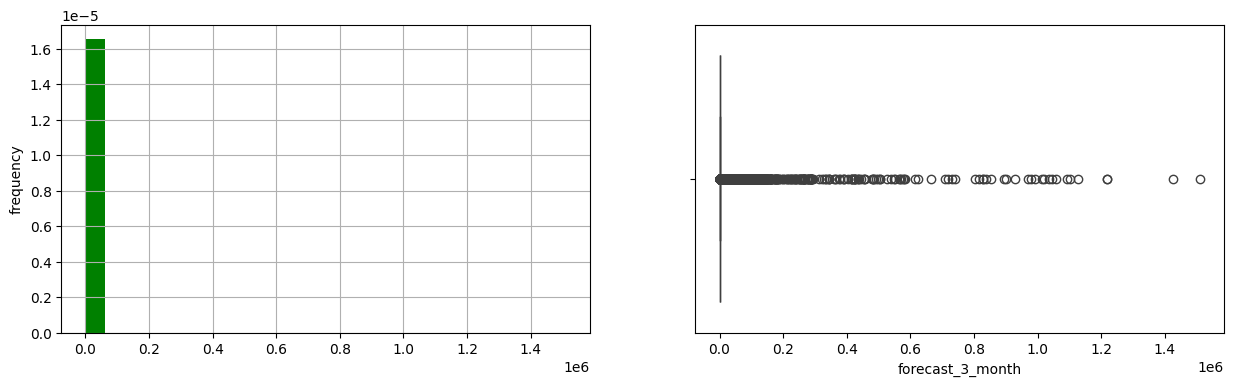

forecast_6_month
Skew : 138.82


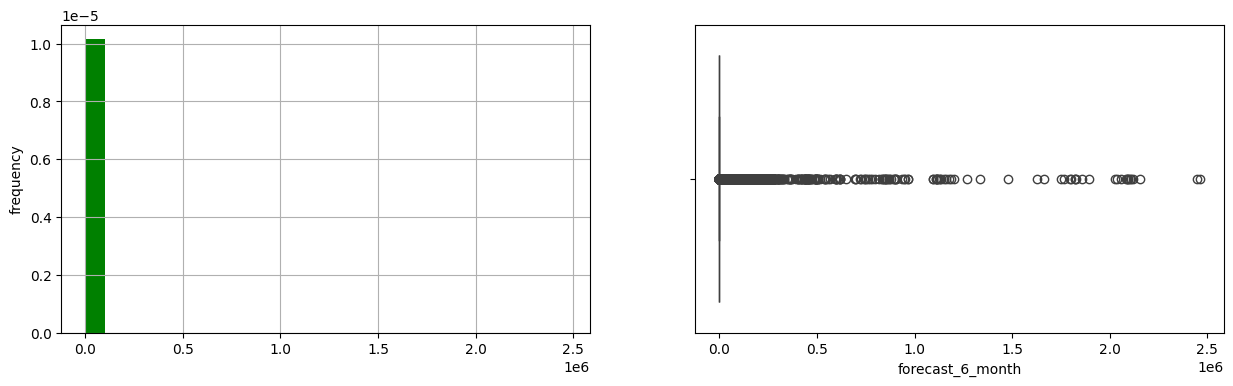

forecast_9_month
Skew : 142.68


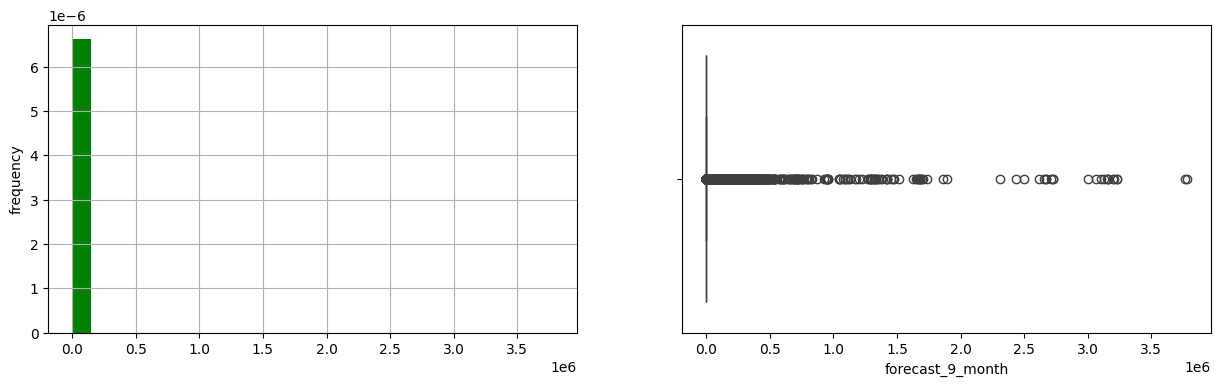

sales_1_month
Skew : 193.72


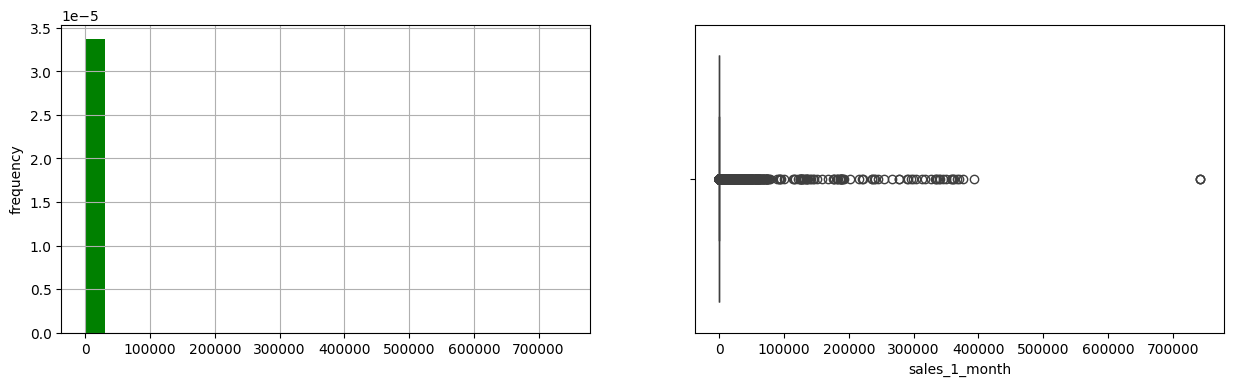

sales_3_month
Skew : 141.81


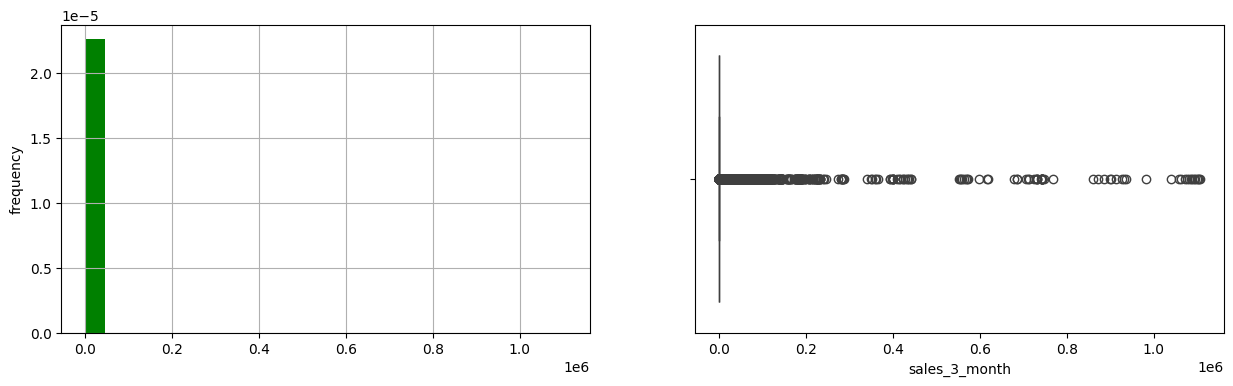

sales_6_month
Skew : 138.93


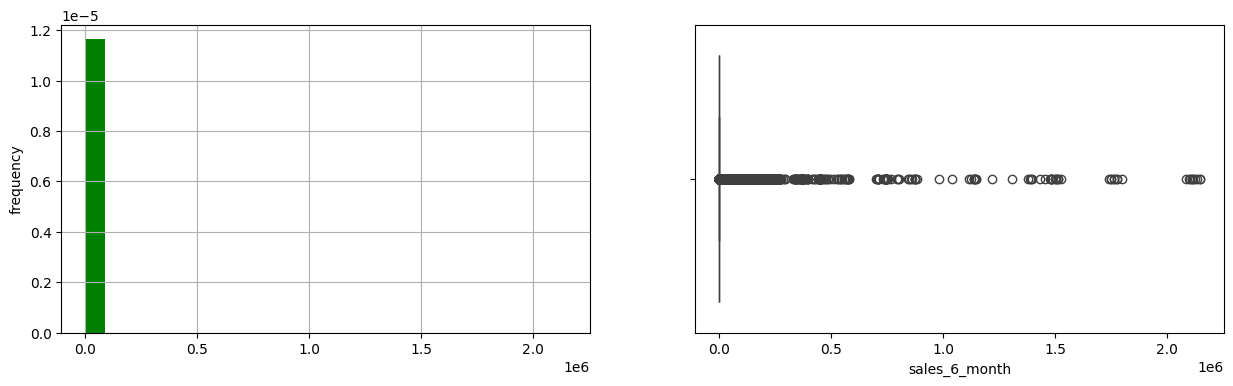

sales_9_month
Skew : 135.44


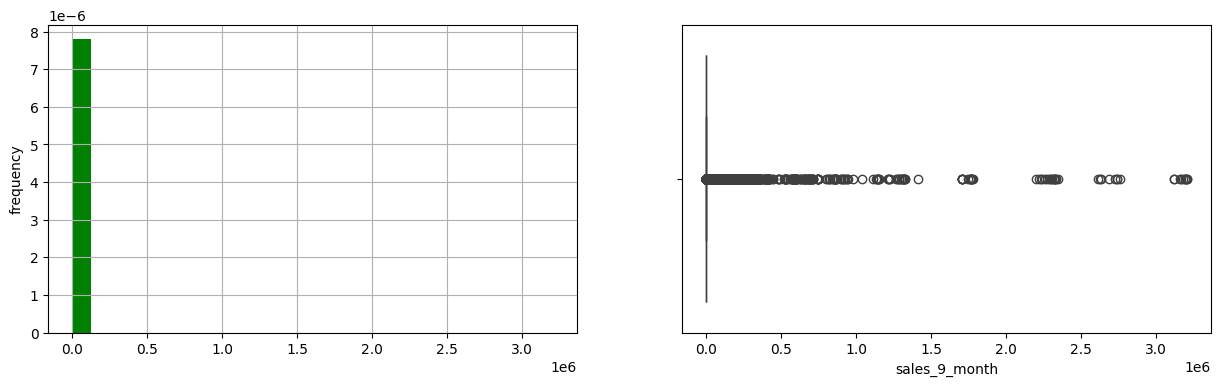

min_bank
Skew : 130.96


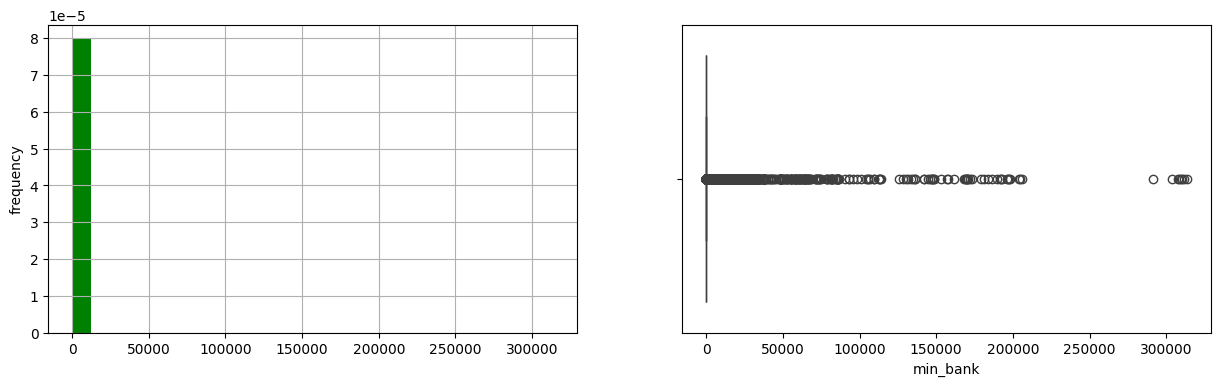

pieces_past_due
Skew : 414.27


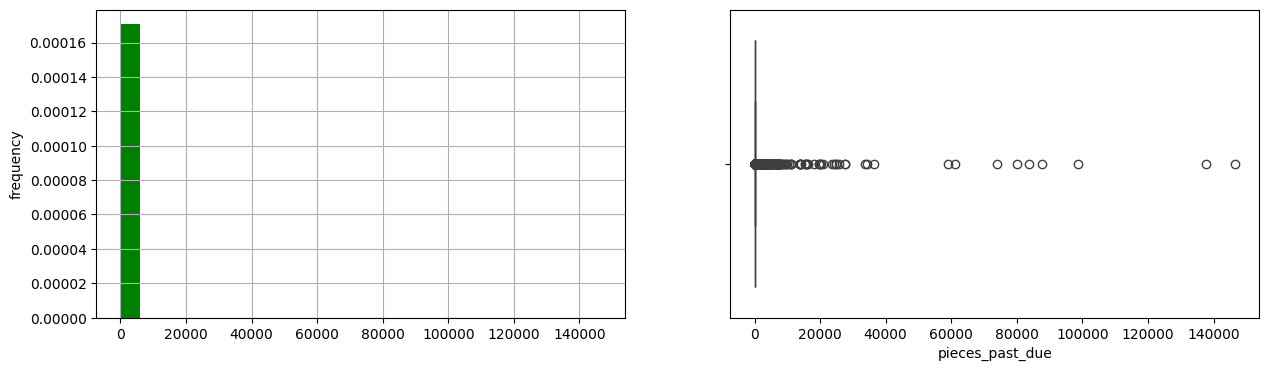

perf_6_month_avg
Skew : -3.17


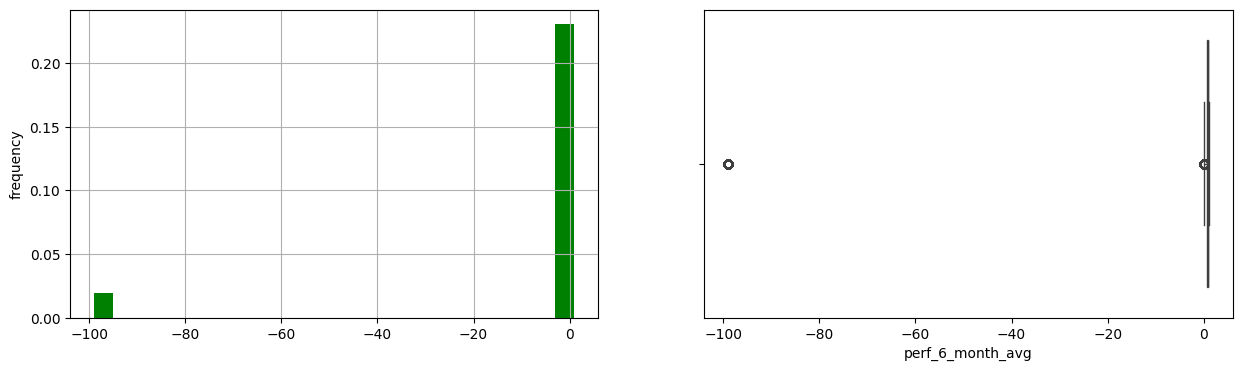

perf_12_month_avg
Skew : -3.3


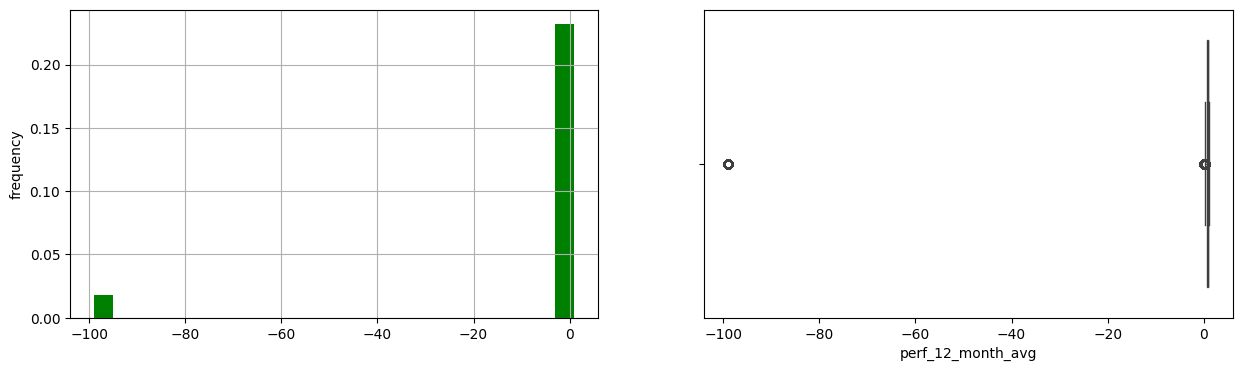

local_bo_qty
Skew : 149.62


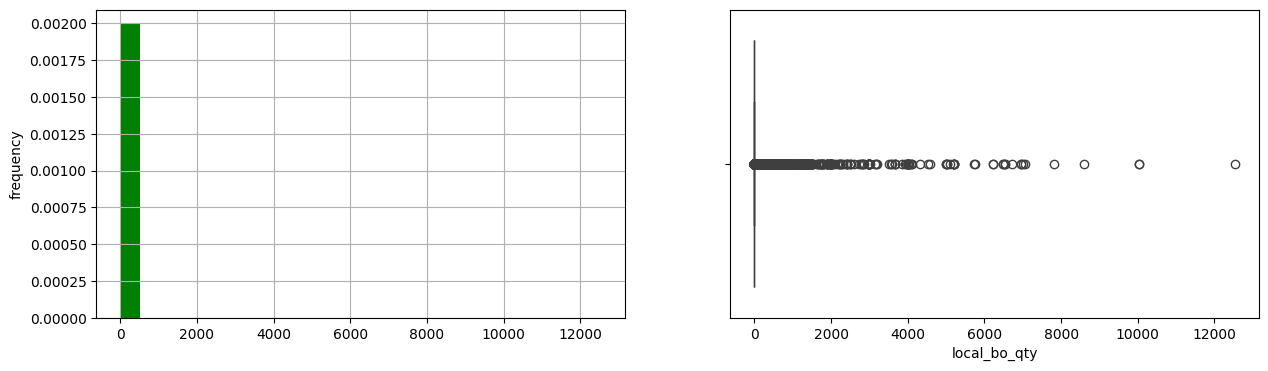

In [15]:
for col in num_features:  
    print(col)
    print('Skew :', round(num_features[col].skew(), 2))  # For measuring skewness for each col
    plt.figure(figsize= (15,4))
    plt.subplot(1, 2, 1)
    num_features[col].hist(bins=25,density=True,color='green') 
    plt.ylabel('frequency')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_features[col])
    plt.show()

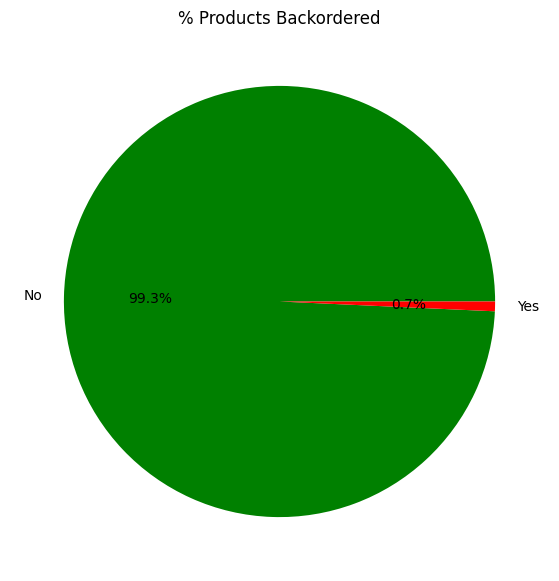

In [16]:
colors = ['green', 'red']

fig = plt.figure(figsize =(10, 7))
plt.title('% Products Backordered')
plt.pie(cat_features['went_on_backorder'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',colors=colors)
plt.show()

##### It's clear that the target variable is highly imbalanced as shown in the figure above. This means that the data has more 0 (No) and less 1 (Yes), so we can say that the data is sparse. Let's check for other features to check sparsity in the data.

In [17]:
for i in num_features.columns:
    print(num_features[i].value_counts())
    print('/n*******/n')

national_inv
2.0        123407
0.0        123077
3.0        103497
4.0         79724
5.0         67702
            ...  
31061.0         1
15557.0         1
73128.0         1
8402.0          1
9888.0          1
Name: count, Length: 15903, dtype: int64
/n*******/n
lead_time
8.0     896336
2.0     384319
12.0    228997
4.0     147045
9.0     141423
52.0     34418
3.0      18602
10.0     16248
0.0      12026
14.0     11820
16.0     10132
13.0      6160
6.0       5826
5.0       4609
15.0      4355
17.0      4300
11.0      1246
20.0       477
30.0       356
18.0       253
7.0        239
22.0       152
24.0       148
26.0       120
28.0        96
40.0        56
21.0        56
35.0        40
19.0        32
1.0         24
23.0        16
25.0         8
Name: count, dtype: int64
/n*******/n
in_transit_qty
0.0        1541942
1.0          41250
2.0          25128
3.0          19506
4.0          17436
            ...   
1981.0           1
2136.0           1
5018.0           1
1178.0           1
165

In [18]:
for i in cat_features.columns:
    print(cat_features[i].value_counts())
    print('/n*******/n')

potential_issue
No     1928946
Yes        989
Name: count, dtype: int64
/n*******/n
deck_risk
No     1494482
Yes     435453
Name: count, dtype: int64
/n*******/n
oe_constraint
No     1929643
Yes        292
Name: count, dtype: int64
/n*******/n
ppap_risk
No     1697383
Yes     232552
Name: count, dtype: int64
/n*******/n
stop_auto_buy
Yes    1859391
No       70544
Name: count, dtype: int64
/n*******/n
rev_stop
No     1929096
Yes        839
Name: count, dtype: int64
/n*******/n
went_on_backorder
No     1915954
Yes      13981
Name: count, dtype: int64
/n*******/n


##### From the above two cells we can see that the numerical features have a lot of zeroes and also the categorical features have No/Yes split as 80/20 or atmost 75/25 which indicates the nature of the data as imbalanced. Thus we need to account for this imbalance data to remove any bias.

##### Heatmap to check multicollinearity

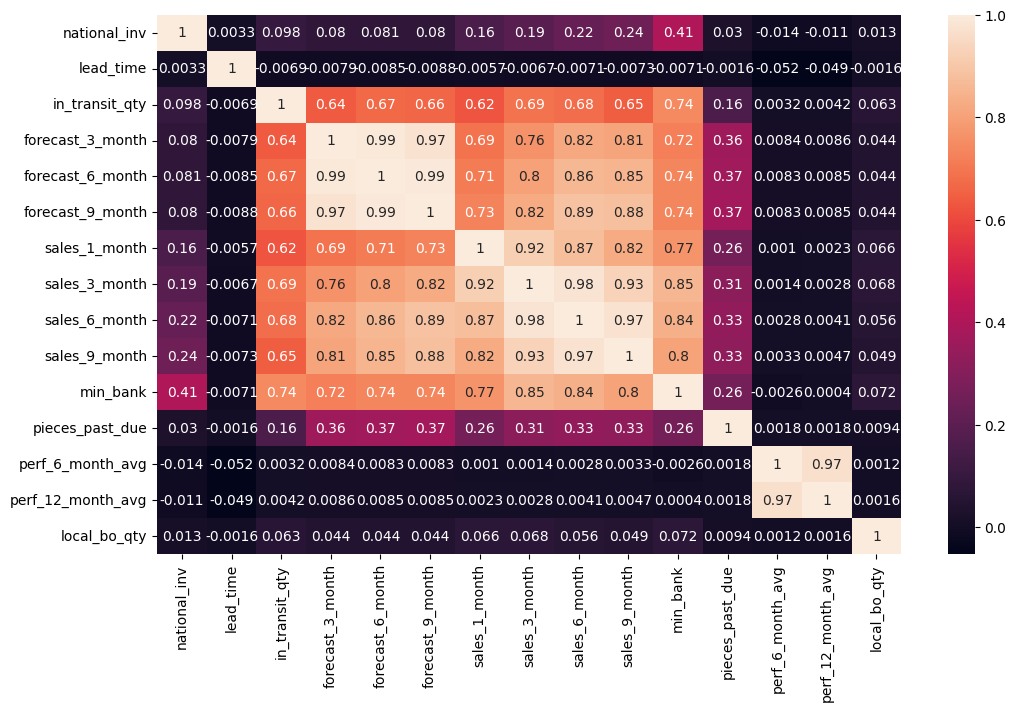

In [19]:
plt.figure(figsize=(12, 7))
sns.heatmap(num_features.corr(method='pearson'), annot = True) #pearson correlation coefficient
plt.show()

1. The forecast sales(forecasted_per_month) and historical sales(sales_per_month) have great correlation amongst themselves and with each other.
2. min_bank which is the minimum required inventory or stock to ensure smoother operations in the supply chain (acts as a buffer for unexpected demand) has  correlation with forecast and historical sales. On an average (0.83)
3. per_6_month_avg and perf_12_month_avg have good correlation. (0.97)
4. in_transit_qty representing transit quantity of the specific product has decent correlation with forecasted,historical sales and safety stock.

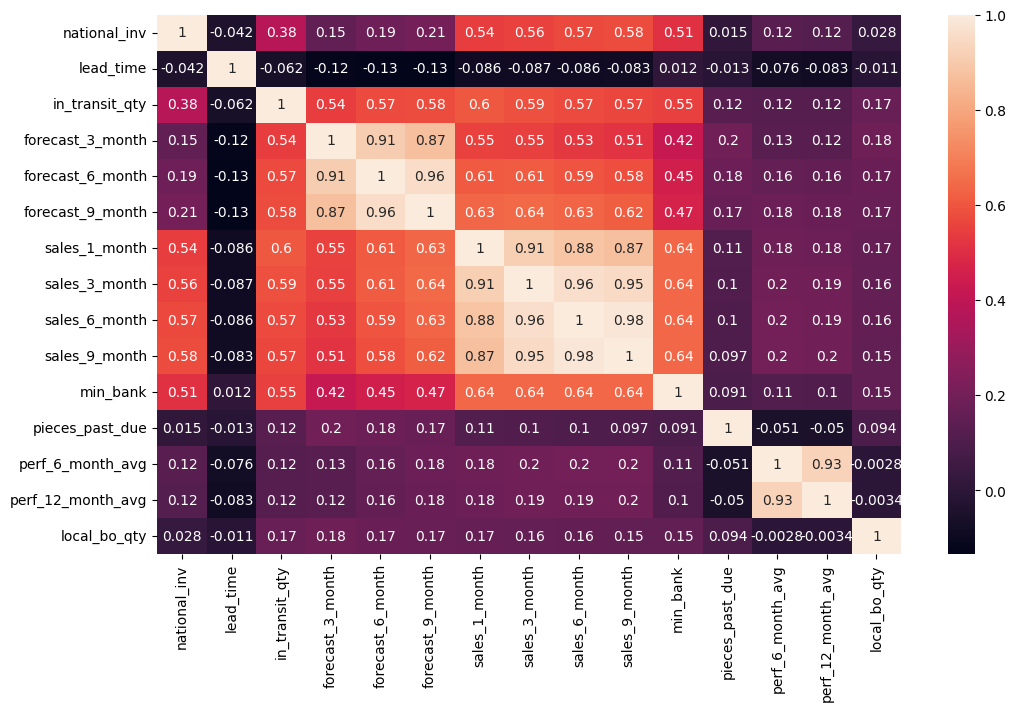

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(num_features.corr(method='spearman'), annot = True)  #spearman rank coefficient
plt.show()

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='forecast_3_month',y='forecast_6_month',hue='went_on_backorder')
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='forecast_3_month',y='forecast_9_month',hue='went_on_backorder')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='forecast_6_month',y='forecast_9_month',hue='went_on_backorder')

<Axes: xlabel='forecast_6_month', ylabel='forecast_9_month'>

c:\Users\HP\Desktop\backorder project\backorder\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


Due to total dominance of majority class over minority class in this highly imbalanced dataset, the minority class is not visible clearly.

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.scatterplot(data=num_features,x='sales_1_month',y='sales_3_month')
plt.subplot(2,3,2)
sns.scatterplot(data=num_features,x='sales_1_month',y='sales_6_month')
plt.subplot(2,3,3)
sns.scatterplot(data=num_features,x='sales_1_month',y='sales_9_month')
plt.subplot(2,3,4)
sns.scatterplot(data=num_features,x='sales_3_month',y='sales_6_month')
plt.subplot(2,3,5)
sns.scatterplot(data=num_features,x='sales_3_month',y='sales_9_month')
plt.subplot(2,3,6)
sns.scatterplot(data=num_features,x='sales_6_month',y='sales_9_month')

<Axes: xlabel='sales_6_month', ylabel='sales_9_month'>

In [23]:
plt.figure(figsize=(15,12))
plt.subplot(3,4,1)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_1_month')
plt.subplot(3,4,2)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_3_month')
plt.subplot(3,4,3)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_6_month')
plt.subplot(3,4,4)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_9_month')
plt.subplot(3,4,5)
sns.scatterplot(data=num_features,x='sales_1_month',y='forecast_9_month')
plt.subplot(3,4,6)
sns.scatterplot(data=num_features,x='sales_3_month',y='forecast_9_month')
plt.subplot(3,4,7)
sns.scatterplot(data=num_features,x='sales_6_month',y='forecast_9_month')
plt.subplot(3,4,8)
sns.scatterplot(data=num_features,x='sales_9_month',y='forecast_9_month')
plt.subplot(3,4,9)
sns.scatterplot(data=num_features,x='sales_1_month',y='forecast_6_month')
plt.subplot(3,4,10)
sns.scatterplot(data=num_features,x='sales_3_month',y='forecast_6_month')
plt.subplot(3,4,11)
sns.scatterplot(data=num_features,x='sales_6_month',y='forecast_6_month')
plt.subplot(3,4,12)
sns.scatterplot(data=num_features,x='sales_9_month',y='forecast_6_month')

<Axes: xlabel='sales_9_month', ylabel='forecast_6_month'>

c:\Users\HP\Desktop\backorder project\backorder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


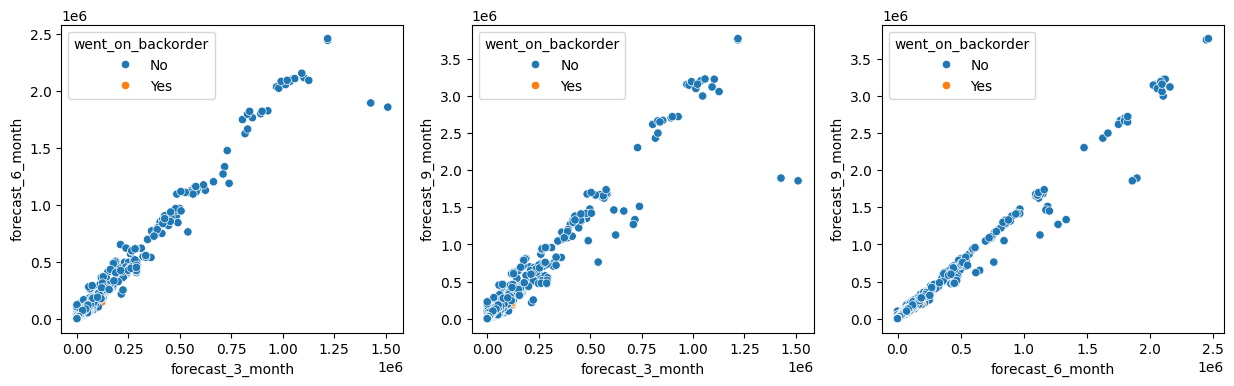

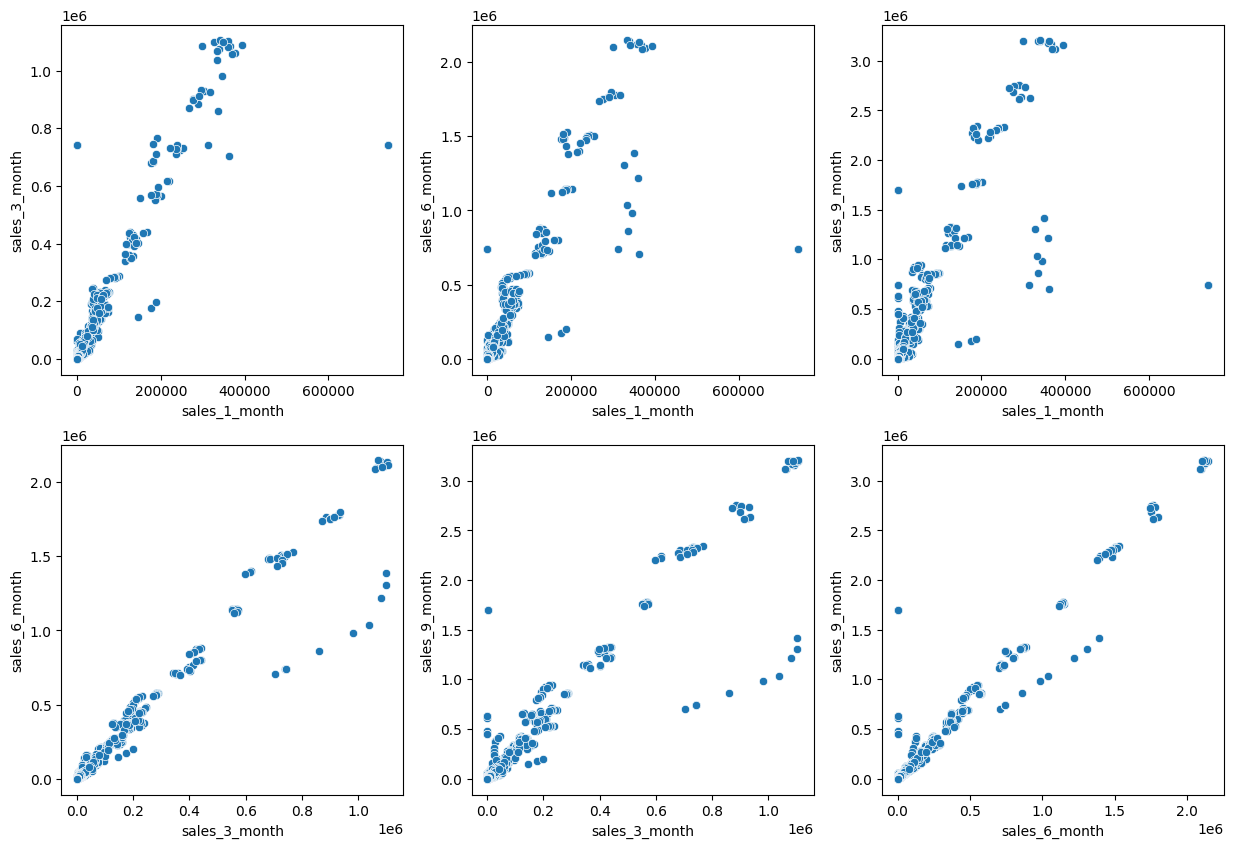

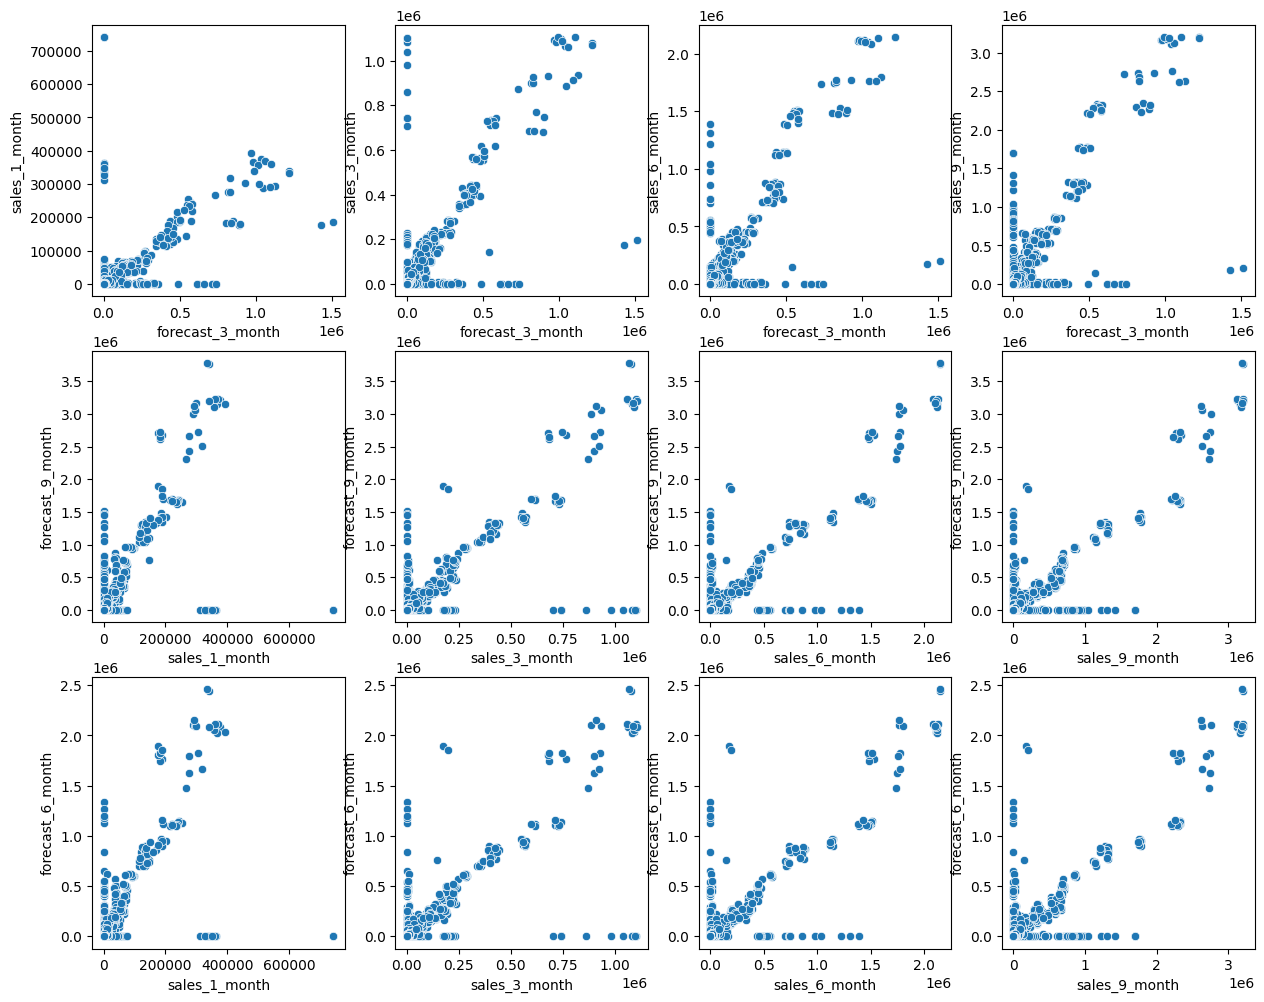

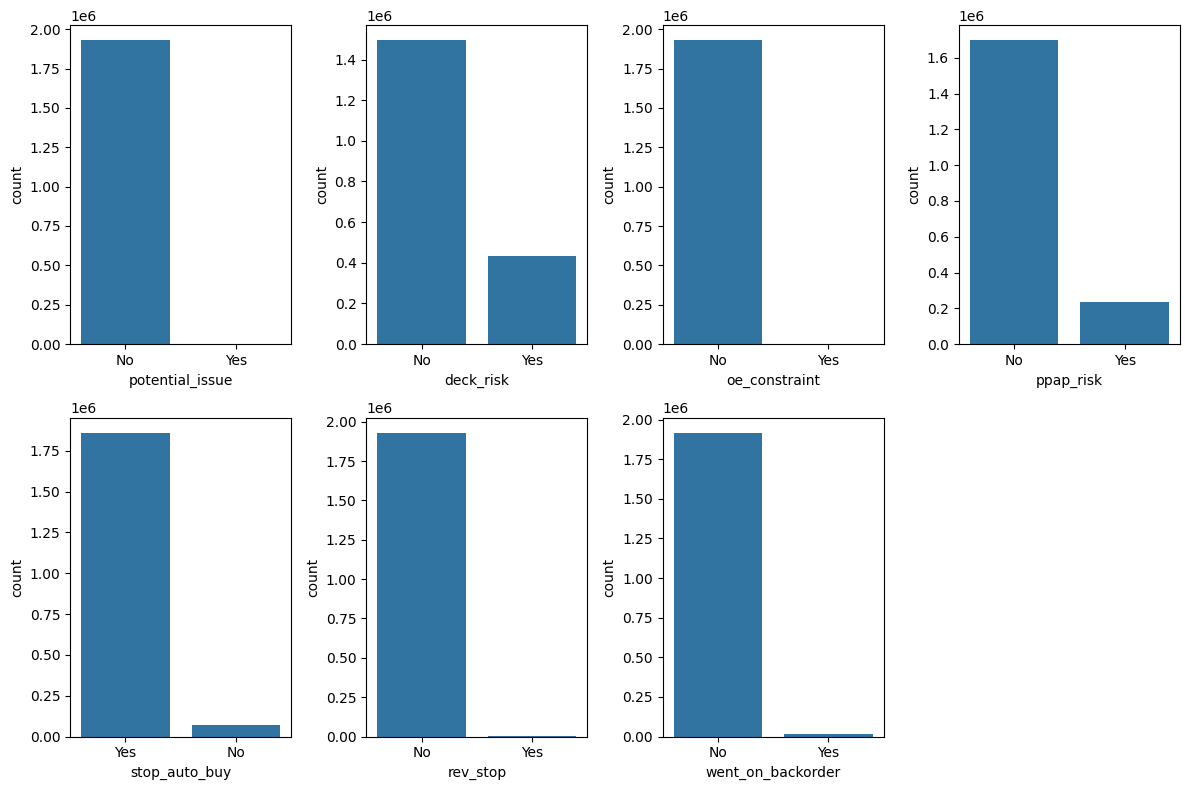

In [24]:
plt.figure(figsize=(12,8))

for i,col in enumerate(cat_features,start=1):
    plt.subplot(2,4,i)
    sns.countplot(data=cat_features,x=col)

plt.tight_layout()
plt.show()

In [26]:
from itertools import product
import scipy.stats as ss

cat_var1= ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']
cat_var2= ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']
cat_var_prod= list(product(cat_var1,cat_var2))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(cat_features[i[0]], cat_features[i[1]])))[1]))
        
for i in result:
    if i[2] <= 0.05:
        print('The columns {} and {} have relationship between them'.format(i[0],i[1]))

The columns potential_issue and deck_risk have relationship between them
The columns potential_issue and oe_constraint have relationship between them
The columns potential_issue and ppap_risk have relationship between them
The columns potential_issue and stop_auto_buy have relationship between them
The columns deck_risk and potential_issue have relationship between them
The columns deck_risk and ppap_risk have relationship between them
The columns deck_risk and stop_auto_buy have relationship between them
The columns deck_risk and rev_stop have relationship between them
The columns oe_constraint and potential_issue have relationship between them
The columns oe_constraint and ppap_risk have relationship between them
The columns oe_constraint and stop_auto_buy have relationship between them
The columns ppap_risk and potential_issue have relationship between them
The columns ppap_risk and deck_risk have relationship between them
The columns ppap_risk and oe_constraint have relationship be

##### By running the above cells for different combinations of categorical varibales, we get some relationship evidence which indicates that there is some correlation between categorical varibles too. 12 unique relationships